In [ ]:
!pip install pycaret[full] -U # Deve demorar aproximadamente 3 a 4 minutos.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 6.9 MB/s et

**É necessário reiniciar o ambiente de execução**

In [ ]:
!python --version

Python 3.10.12


In [ ]:
import numpy as np
import pandas as pd

# Carregando a ABT

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# carrega a abt

pasta_raiz = '/content/drive/MyDrive/datasets/olist'

df_abt = pd.read_csv(f'{pasta_raiz}/propensao_revenda_abt.csv')

# pega a base de treinamento
df_train = df_abt.query('data_ref_safra < "2018-03-01"')

# pega a base de avaliação (out of time)
df_oot   = df_abt.query('data_ref_safra == "2018-03-01"')

# Identificando as Variáveis de Modelagem

In [1]:
key_vars = ['data_ref_safra', 'seller_id']
num_vars = ['tot_orders_12m', 'tot_items_12m', 'tot_items_dist_12m', 'receita_12m', 'recencia']
cat_vars = ['uf']
target = 'nao_revendeu_next_6m'

features = cat_vars + num_vars

# Instalando o Pycaret no Colab

Vamos instalar a versão completa pycaret de acordo com as instruções na [installation page](https://pycaret.readthedocs.io/en/latest/installation.html)

In [ ]:
import pycaret
pycaret.__version__

'3.2.0'

# Usando o PyCaret

O **PyCaret** possui a função `setup`, que serve para definirmos os tipos de variáveis, pré-processamento das variáveis e muito mais!

In [ ]:
# importando todas as funções do módulo classification da biblioteca pycaret
from pycaret.classification import *

exp_setup = setup(data=df_train, test_data=df_oot, target=target,
                  ignore_features=key_vars, categorical_features=cat_vars, numeric_features=num_vars, session_id=42)

,Description,Value
0,Session id,42
1,Target,nao_revendeu_next_6m
2,Target type,Binary
3,Original data shape,"(5369, 9)"
4,Transformed data shape,"(5369, 28)"
5,Transformed train set shape,"(3495, 28)"
6,Transformed test set shape,"(1874, 28)"
7,Ignore features,2
8,Numeric features,5
9,Categorical features,1


In [ ]:
type(exp_setup)

pycaret.classification.oop.ClassificationExperiment

Podemos sempre rever qual a configuração do experimento que estamos realizado com o comando `help(get_config)`

In [ ]:
help(get_config)

Help on function get_config in module pycaret.classification.functional:

get_config(variable: Optional[str] = None)
    This function is used to access global environment variables.
    
    Example
    -------
    >>> X_train = get_config('X_train')
    
    This will return training features.
    
    
    variable : str, default = None
        Name of the variable to return the value of. If None,
        will return a list of possible names.
    
    
    Returns
    -------
    variable



Com a função `get_config`, podemos buscar qualquer um dos objetos de configuração. Podemos buscars os dados transformados:

In [ ]:
get_config('X')

,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia
0,SP,3,3,1,2685.000000,74
1,ES,171,207,9,21275.230469,2
2,SP,38,42,15,781.799988,2
3,GO,1,1,1,120.000000,16
4,SP,130,141,75,16228.879883,8
...,...,...,...,...,...,...
5364,MG,4,4,3,124.599998,12
5365,SP,5,5,5,385.589996,0
5366,PR,11,12,8,1450.199951,7
5367,SP,13,13,3,1709.869995,0


Também o pipeline de preparação dos dados:

In [ ]:
get_config('pipeline')

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['tot_orders_12m', 'tot_items_12m',
                                             'tot_items_dist_12m',
                                             'receita_12m', 'recencia'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated...
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('onehot_encoding',
                 TransformerWrapper(exclude=None, include=['uf'],
                                    transformer=OneHotEncoder(cols=['uf'],
                                                              drop_invariant=False,
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              return_df=True,
                                                              use_cat_names=True,
                                                              verbose=0)))],
         verbose=False)

# Treinando Vários Modelos

A função `compare_models()` irá treinar vários modelos, avaliá-los usando cross-validation e retornar o melhor modelo. Os modelos são treinados usando apenas os dados de treino.
Essa função imprime uma tabela com os resultados de todos os modelos e retorna o melhor modelo de acordo com a métrica passada no parâmetro `sort`. Por padrão, ela escolhe o melhor modelo usando a `acurácia`, mas vamos pedir pra ele retornar o modelo com a melhor `auc`.

In [ ]:
compare_models(fold=5, sort='auc')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8492,0.9219,0.7748,0.8198,0.7964,0.6769,0.6778,0.8900
et,Extra Trees Classifier,0.8561,0.9208,0.7786,0.8330,0.8049,0.6911,0.6921,0.4560
xgboost,Extreme Gradient Boosting,0.8452,0.9187,0.7808,0.8066,0.7933,0.6697,0.6701,0.1920
catboost,CatBoost Classifier,0.8464,0.9180,0.7823,0.8089,0.7951,0.6723,0.6728,3.6320
lightgbm,Light Gradient Boosting Machine,0.8466,0.9159,0.7876,0.8059,0.7965,0.6735,0.6737,1.4560
gbc,Gradient Boosting Classifier,0.8352,0.9128,0.7681,0.7936,0.7803,0.6485,0.6491,0.7020
lda,Linear Discriminant Analysis,0.8103,0.8979,0.5803,0.8816,0.6997,0.5696,0.5963,0.1480
ada,Ada Boost Classifier,0.8223,0.8974,0.7425,0.7821,0.7611,0.6199,0.6212,0.4120
lr,Logistic Regression,0.8235,0.8973,0.6517,0.8503,0.7377,0.6081,0.6205,2.8140
nb,Naive Bayes,0.5525,0.8662,0.9474,0.4582,0.6176,0.2132,0.3049,0.3480


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

Caso queiramos os resultados printados na tabela em um dataframe, basta apenas executarmos a função `pull` depois de qualquer resultado impresso.

In [ ]:
compare_models_results = pull()
compare_models_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8492,0.9219,0.7748,0.8198,0.7964,0.6769,0.6778,0.890
et,Extra Trees Classifier,0.8561,0.9208,0.7786,0.8330,0.8049,0.6911,0.6921,0.456
xgboost,Extreme Gradient Boosting,0.8452,0.9187,0.7808,0.8066,0.7933,0.6697,0.6701,0.192
catboost,CatBoost Classifier,0.8464,0.9180,0.7823,0.8089,0.7951,0.6723,0.6728,3.632
lightgbm,Light Gradient Boosting Machine,0.8466,0.9159,0.7876,0.8059,0.7965,0.6735,0.6737,1.456
gbc,Gradient Boosting Classifier,0.8352,0.9128,0.7681,0.7936,0.7803,0.6485,0.6491,0.702
lda,Linear Discriminant Analysis,0.8103,0.8979,0.5803,0.8816,0.6997,0.5696,0.5963,0.148
ada,Ada Boost Classifier,0.8223,0.8974,0.7425,0.7821,0.7611,0.6199,0.6212,0.412
lr,Logistic Regression,0.8235,0.8973,0.6517,0.8503,0.7377,0.6081,0.6205,2.814
nb,Naive Bayes,0.5525,0.8662,0.9474,0.4582,0.6176,0.2132,0.3049,0.348


Podemos então salvar para uso futuro:

In [ ]:
compare_models_results.to_csv(f'{pasta_raiz}/compare_models_results.csv', index=False)

Vendo o melhor modelo encontrado:

O melhor modelo encontrado foi uma `Random Forest`.

In [ ]:
rf = create_model('rf', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8526,0.9271,0.7566,0.8417,0.7968,0.6818,0.6841
1,0.8240,0.9102,0.7341,0.7903,0.7612,0.6222,0.6232
2,0.8512,0.9173,0.7707,0.8266,0.7977,0.6802,0.6813
3,0.8498,0.9248,0.7857,0.8132,0.7992,0.6793,0.6795
4,0.8684,0.9298,0.8271,0.8271,0.8271,0.7208,0.7208
Mean,0.8492,0.9219,0.7748,0.8198,0.7964,0.6769,0.6778
Std,0.0143,0.0072,0.0312,0.0173,0.0209,0.0315,0.0313


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

Perceba que as métricas na tabela acima são as mesmas apresentadas na tabela gerada no `compare_models()`.

# Otimização de Hiperparâmetros

A função `tune_model` realizar um `RandomSearch` com 10 iterações por padrão. Aumentar o número de iterações geralmente leva a chances maiores de termos modelos mais otimizados.

`RandomSearch` é uma outra versão do `GridSearch`, que ao invés de fazer uma busca completa pelo grid, irá buscar de forma aleatória pela quantidade de vezes que passarmos no parâmetro `n_iter`. Por padrão, `n_iter = 10`.

In [ ]:
tuned_rf = tune_model(rf, fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8255,0.9123,0.7378,0.7912,0.7636,0.6255,0.6265
1,0.8183,0.8928,0.7678,0.7593,0.7635,0.6160,0.6160
2,0.8612,0.9092,0.7820,0.8421,0.8109,0.7015,0.7028
3,0.8426,0.9164,0.7970,0.7910,0.7940,0.6667,0.6667
4,0.8298,0.9099,0.7820,0.7732,0.7776,0.6397,0.6397
Mean,0.8355,0.9081,0.7733,0.7914,0.7819,0.6499,0.6503
Std,0.0151,0.0080,0.0200,0.0281,0.0183,0.0310,0.0312


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Nâo conseguimos melhorar o modelo original. Vamos tentar aumentar a quantidade de iterações para 30.

In [ ]:
tuned_rf = tune_model(rf, fold=5, optimize='AUC', n_iter=30)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8255,0.9123,0.7378,0.7912,0.7636,0.6255,0.6265
1,0.8183,0.8928,0.7678,0.7593,0.7635,0.6160,0.6160
2,0.8612,0.9092,0.7820,0.8421,0.8109,0.7015,0.7028
3,0.8426,0.9164,0.7970,0.7910,0.7940,0.6667,0.6667
4,0.8298,0.9099,0.7820,0.7732,0.7776,0.6397,0.6397
Mean,0.8355,0.9081,0.7733,0.7914,0.7819,0.6499,0.6503
Std,0.0151,0.0080,0.0200,0.0281,0.0183,0.0310,0.0312


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 30 candidates, totalling 150 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# Analizando o Modelo e as Métricas

### Curva ROC

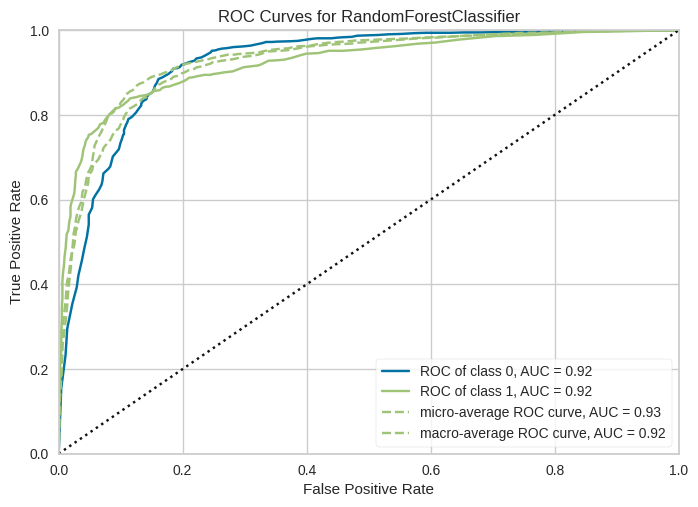

In [ ]:
plot_model(rf, plot='auc')

### Feature Importance

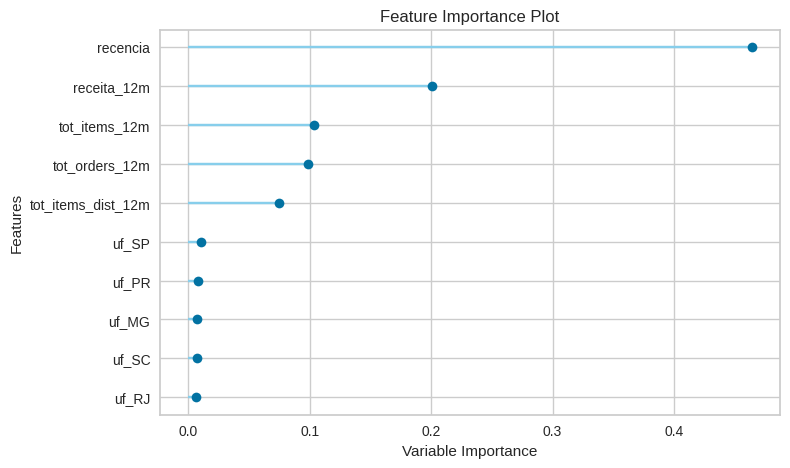

In [ ]:
plot_model(rf, plot='feature')

### Matriz de Confusão

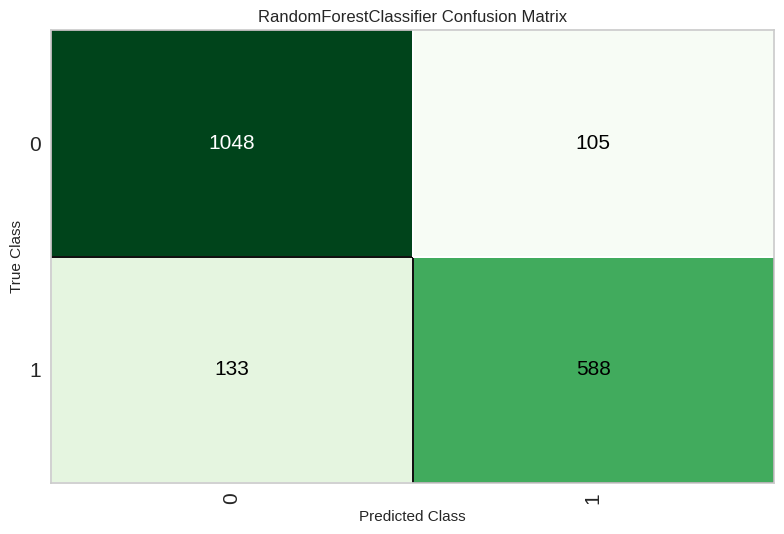

In [ ]:
plot_model(rf, plot='confusion_matrix')

### Shap Values

Para construir o `shap_values`, precisamos de dois objetos:

1. Algoritmo treinado
2. Base de dados de teste (oot)

O algoritmo treinado no nosso caso é uma `Random Forest` (`rf`) e a nossa base de teste (oot) pode ser acessada através do comando `get_config(X_test)`.

In [ ]:
# algoritmo
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [ ]:
# base de teste (oot)
X_test = get_config('X_test')
X_test.head()

,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia
3495,SP,3,3,1,2685.000000,133
3496,ES,178,209,9,21621.130859,8
3497,SP,44,48,20,1029.199951,4
3498,GO,1,1,1,120.000000,75
3499,SP,124,132,72,15104.919922,12


In [ ]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

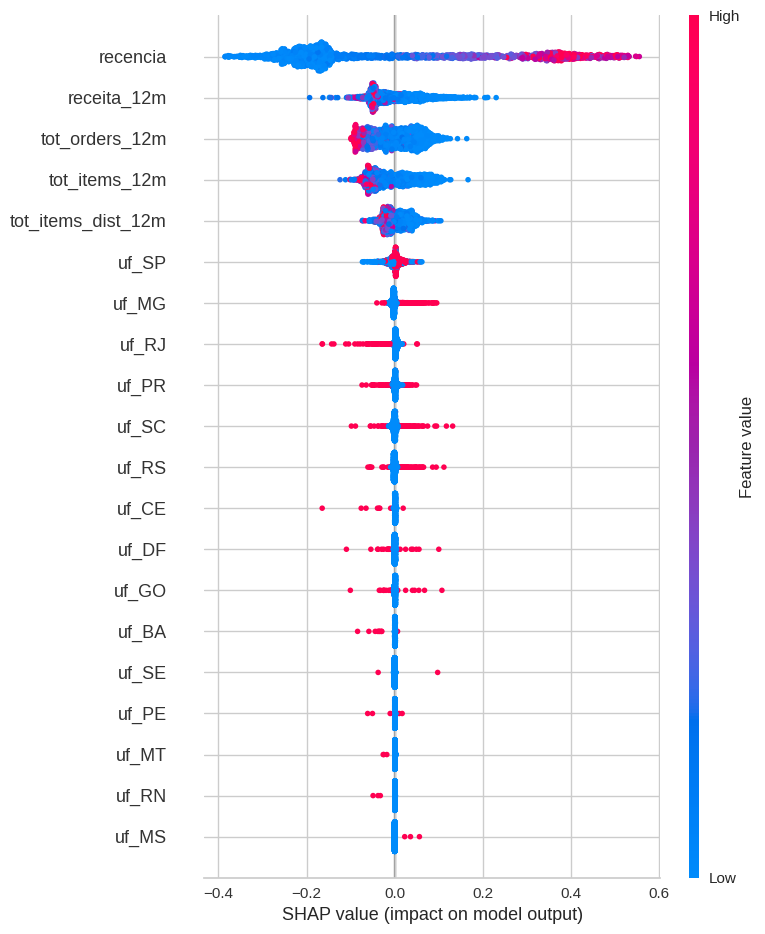

In [ ]:
interpret_model(rf)

In [ ]:
help(interpret_model)

Help on function interpret_model in module pycaret.classification.functional:

interpret_model(estimator, plot: str = 'summary', feature: Optional[str] = None, observation: Optional[int] = None, use_train_data: bool = False, X_new_sample: Optional[pandas.core.frame.DataFrame] = None, y_new_sample: Optional[pandas.core.frame.DataFrame] = None, save: Union[str, bool] = False, **kwargs)
    This function takes a trained model object and returns an interpretation plot
    based on the test / hold-out set.
    
    This function is implemented based on the SHAP (SHapley Additive exPlanations),
    which is a unified approach to explain the output of any machine learning model.
    SHAP connects game theory with local explanations.
    
    For more information: https://shap.readthedocs.io/en/latest/
    
    For more information on Partial Dependence Plot: https://github.com/SauceCat/PDPbox
    
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_d

# Métricas no Conjunto de Test/Hold-Out

In [ ]:
predict_model(rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8730,0.9235,0.8155,0.8485,0.8317,0.7298,0.7301


,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,nao_revendeu_next_6m,prediction_label,prediction_score
3495,SP,3,3,1,2685.000000,133,1,1,0.78
3496,ES,178,209,9,21621.130859,8,0,0,1.00
3497,SP,44,48,20,1029.199951,4,0,0,0.94
3498,GO,1,1,1,120.000000,75,1,1,0.85
3499,SP,124,132,72,15104.919922,12,0,0,1.00
...,...,...,...,...,...,...,...,...,...
5364,MG,4,4,3,124.599998,12,1,0,0.72
5365,SP,5,5,5,385.589996,0,0,0,0.88
5366,PR,11,12,8,1450.199951,7,0,0,0.92
5367,SP,13,13,3,1709.869995,0,0,0,0.91


Nosso modelo está indo muito bem mesmo na nossa base Out of Time!

# Estimativa Ganho Financeiro do Modelo

Vamos calcular o ganho financeiro do modelo imaginando que iremos usá-lo como um modelo de decisão e depois como um modelo de ordenação. Mas antes, vamos calcular a nosso custo médio quando um vendedor não realiza uma venda nos próximos 6 meses.

### Premissas

#### Premissa 1: Custo médio de não-revender

Vamos supor que a cada venda, o vendedor tenha que pagar para a Olist uma comissão média de 10%.

In [ ]:
comissao_12m = (
    df_train
    .query('nao_revendeu_next_6m == 1')
    .assign(comissao_12m = lambda df: df['receita_12m'] * 0.10)
    .filter(['comissao_12m'])
    .mean()
).iloc[0].round()

comissao_12m

110.0

Temos então que a Olist, a cada venda ganha uma comissão média de R$ 110.

Obs: Muitas vezes esse número é fornecido pela própria galera de negócio. Então antes de realizar esse tipo de cálculo, vale sempre a pena conversar com o cliente. Aqui só fazemos a conta antes porque não temos um representante da Olist xD.

#### Premissa 2: Custo do cupom de desconto

Para cada seller que o modelo prever que não irá revender, iremos fornecer um cupom de desconto na comissão cujo custo médio é de **R\$ 20**.

In [ ]:
valor_cupom = 20

## Estimativa de Ganho Financeiro para Modelo de Decisão

Modelos de decisão utilizam um ponto de corte na probabilidade para decidir se um dado exemplo é churn ou não. Nesse caso, utilizamos a matriz de confusão para calcular o ganho financeiro.

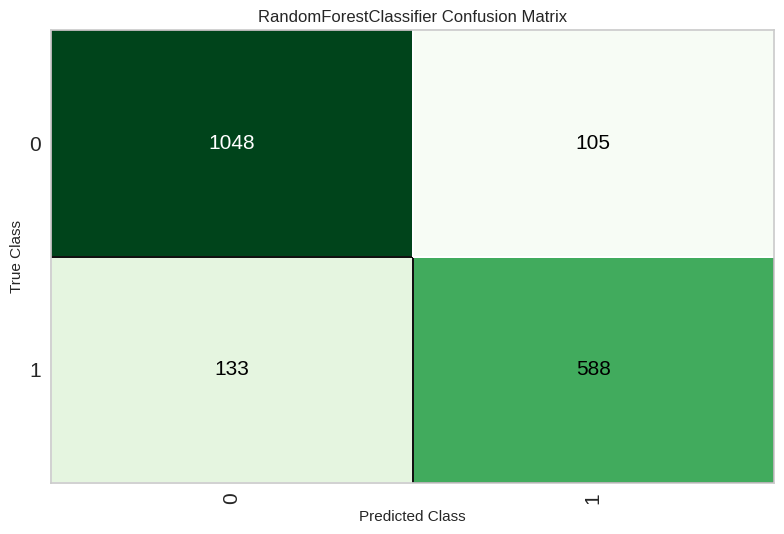

In [ ]:
plot_model(rf, plot='confusion_matrix')

In [ ]:
from sklearn.metrics import confusion_matrix

y_true = get_config('y_test_transformed')
y_pred = rf.predict(get_config('X_test_transformed'))

true_negative, false_positive, false_negative, true_positive = confusion_matrix(y_true, y_pred).ravel()

false_class = true_negative + false_positive
true_class = false_negative + true_positive

print(false_class,true_class)
print(true_negative, false_positive, false_negative, true_positive)

1153 721
1048 105 133 588


In [ ]:
comissao_12m = 200
valor_cupom = 20
total_comissao_perdida = (true_class * comissao_12m)
total_comissao_perdida

144200

In [ ]:
print(f'''
Dos {true_class} sellers que de fato não revenderam, o modelo identificou corretamente {true_positive} ({int(100 * true_positive / true_class)}%).
Caso o modelo tivesse atuado no mês março/2018 (base oot), a perda de comissão teria caído de {true_class} * {comissao_12m} = R${total_comissao_perdida}
para {false_negative} * {comissao_12m} = R${false_negative * comissao_12m}.
''')


Dos 721 sellers que de fato não revenderam, o modelo identificou corretamente 588 (81%).
Caso o modelo tivesse atuado no mês março/2018 (base oot), a perda de comissão teria caído de 721 * 200 = R$144200
para 133 * 200 = R$26600.



In [ ]:
economia_bruta = (total_comissao_perdida) - (false_negative * comissao_12m)
economia_bruta

117600

In [ ]:
print(f'''
Gerando uma economia bruta de R$ {economia_bruta}, o que representa {int(100 * (economia_bruta/(total_comissao_perdida)))}% da perda de comisão.
Podemos incluir também o custo de termos oferecido o cupom de desconto para os True Positives (TP) e False Positives (FP), respectivamente, {true_positive} e {false_positive} sellers.
''')


Gerando uma economia bruta de R$ 117600, o que representa 81% da perda de comisão.
Podemos incluir também o custo de termos oferecido o cupom de desconto para os True Positives (TP) e False Positives (FP), respectivamente, 588 e 105 sellers.



In [ ]:
custo_atuacao_modelo = (true_positive + false_positive) * valor_cupom

print(f'''
Esse custo, representa o custo de atuação do modelo, que é de ({true_positive} + {false_positive}) * R$ {valor_cupom} = R$ {custo_atuacao_modelo}.
Com a economia bruta e o custo de atuação do modelo, podemos calcular a economia líquida ou efetiva:
''')


Esse custo, representa o custo de atuação do modelo, que é de (588 + 105) * R$ 20 = R$ 13860.
Com a economia bruta e o custo de atuação do modelo, podemos calcular a economia líquida ou efetiva:



In [ ]:
economia_efetiva = economia_bruta - custo_atuacao_modelo
print(f'''
Economia bruta: R$ {economia_bruta}
Custo atuação de modelo: R$ {custo_atuacao_modelo}
Economia efetiva = R$ {economia_bruta} - R$ {custo_atuacao_modelo} = R$ {economia_efetiva}, o que representa {int(100 * (economia_efetiva / (total_comissao_perdida)))}% da perda de comissão.
''')


Economia bruta: R$ 117600
Custo atuação de modelo: R$ 13860
Economia efetiva = R$ 117600 - R$ 13860 = R$ 103740, o que representa 71% da perda de comissão.



In [ ]:
print(f'''
Em outras palavras, caso o modelo tivesse em produção e atuado já na safra de março/2018,
do total de comissão perdida de R$ {total_comissao_perdida}, economizaríamos R$ {economia_efetiva} em apenas um mês,
o que extrapolando para o ano dá o valor de 12 * R$ {economia_efetiva} = R$ {12 * economia_efetiva}
que poderia ser recuperado devido à atuação do modelo.
''')


Em outras palavras, caso o modelo tivesse em produção e atuado já na safra de março/2018,
do total de comissão perdida de R$ 144200, economizaríamos R$ 103740 em apenas um mês,
o que extrapolando para o ano dá o valor de 12 * R$ 103740 = R$ 1244880
que poderia ser recuperado devido à atuação do modelo.



Observação:
*Esse custo foi calculado assumindo que o modelo será usado para tomada de decisão automática, com um ponto de corte de 0.5. Mudando esse ponto de corte, a matriz de confusão juntamente com as métricas irá mudar, ocasionando em outros valores piores ou melhores de economia efetiva*.

Caso o modelo seja usado para ordenar os vendedores em nossa base de acordo com a maior probabilidade de dar churn, permitindo assim uma atuação preventiva sob um percentual da base, podemos utilizar a curva de ganhos cumulativos:

## Estimativa de Ganho Financeiro para Modelo de Ordenação

Modelos de ordenação não utilizam ponto de corte sobre a probabilidade. Quando o modelo é usado de forma ordenada ele não toma a decisão final e ao invés disso, apenas fornece o score/probabilidade de um dado seller não revender. Geralmente um analista ou outro sistema toma a decisão de **se** e **como** atua sobre o exemplo. Nesse caso utilizamos a curva de ganhos cumulativos.

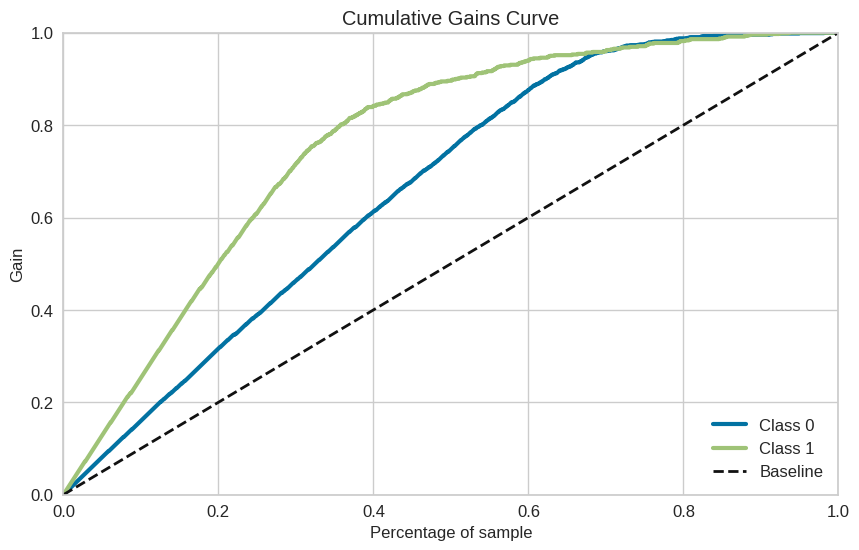

In [ ]:
plot_model(rf, plot='gain')

Atuando em torno de 50% da base ordenada de forma descendente pela probabilidade de não revenda, conseguiríamos identificar aproximadamente 90% dos sellers que não revenderam no mês de março/2018.



Com essa interpretação dos ganhos cumulativos, **podemos perguntar qual seria o melhor cenário?**

Para responder essa pergunta, precisamos analisar as probabilidades da classe 1 para todos os vendedores. O melhor cenário terá todos os vendedores que não realizaram uma venda nos últimos 6 meses no topo das probabilidades ordenadas.

Nesse caso, podemos computar o percentual de vendedores que não irão fazer uma venda em relação a todos os vendedores.

    expected_class_1_rate = (TP + FN) / (TP + TN + FN + FP)



In [ ]:
expected_class_1_rate = (true_positive + false_negative) / (true_positive + true_negative + false_negative + false_positive)
expected_class_1_rate

0.3847385272145144

O código abaixo é apenas ilustrativo e foi criado manualmente.

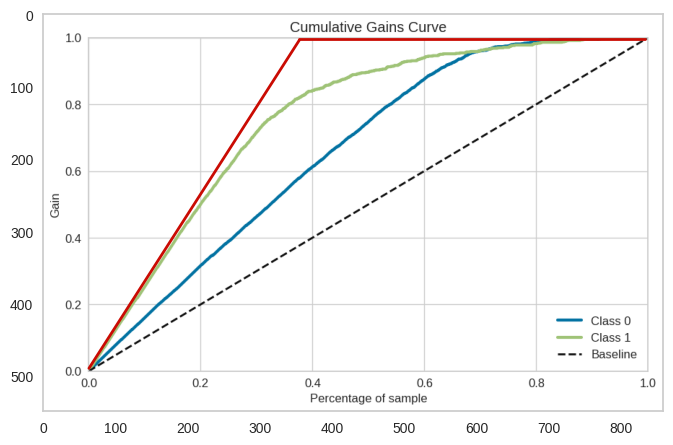

In [ ]:
import matplotlib.pyplot as plt

path_image = plot_model(rf, plot='gain', save=True)
image = plt.imread(path_image)

# Create a new figure and plot the image
fig, ax = plt.subplots()
ax.imshow(image)
#ax.axis('off')
ax.grid(False)

value_plot = round(expected_class_1_rate, 4) * 1000

x = np.array([0+63, value_plot-30])
y = np.array([image.shape[0]-60, 35])
ax.plot(x, y, 'r-', linewidth=2)

x = np.array([value_plot-30, image.shape[1]-25])
y = np.array([0+34, 0+34])
ax.plot(x, y, 'r-', linewidth=2)


A linha vermelha indica o melhor cenário que teremos considerando a taxa que calculamos anteriormente.

Com isso podemos, **será que conseguiriamos identificar 100% dos sellers que não revenderam no mês de março/2018, recuperando somente as 38.5%?**

In [ ]:
# passando o corte de 38.5% na base ordenada, será que conseguimos realmente identificar todos os 721 sellers
# que não revenderam, como indica a figura (linha vermelha)?
df_sorted = (
    predict_model(rf, data=df_oot)
    .assign(score_label1 = lambda df: np.where(df['nao_revendeu_next_6m'] == 1, df['prediction_score'], 1-df['prediction_score']))
    # ordenando a base
    .sort_values(by='score_label1', ascending=False)
    # passando o corte da base ordenada
)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8730,0.9235,0.8155,0.8485,0.8317,0.7298,0.7301


In [ ]:
(
    df_sorted
    .head(int(len(df_sorted) * expected_class_1_rate))
    .filter(['nao_revendeu_next_6m'])
    .value_counts()
)

nao_revendeu_next_6m
1                       720
0                         1
dtype: int64

Como podemos ver existem nos top 721 vendedores da base ordenada não são de fato os 721 vendedores que não revenderam. Isso acontece pois o `.head` necessita que o valor seja um inteiro, com isso iremos arredondar para cima.

In [ ]:
res = (
    df_sorted
    .head(int(len(df_sorted) * 0.39))
    .filter(['nao_revendeu_next_6m'])
    .value_counts()
)

res

nao_revendeu_next_6m
1                       721
0                         9
dtype: int64

In [ ]:
custo_atuacao_modelo = res.sum() * valor_cupom
custo_atuacao_modelo

14600

In [ ]:
economia_bruta = (total_comissao_perdida)
economia_bruta

144200

In [ ]:
economia_efetiva = economia_bruta - custo_atuacao_modelo
print(f'''
Economia bruta: R$ {economia_bruta}
Custo atuação de modelo: R$ {custo_atuacao_modelo}
Economia efetiva = R$ {economia_bruta} - R$ {custo_atuacao_modelo} = R$ {economia_efetiva}, o que representa {int(100 * (economia_efetiva / (total_comissao_perdida)))}% da perda de comissão.
''')


Economia bruta: R$ 144200
Custo atuação de modelo: R$ 14600
Economia efetiva = R$ 144200 - R$ 14600 = R$ 129600, o que representa 89% da perda de comissão.



In [ ]:
print(f'''
Em outras palavras, caso o modelo tivesse em produção e atuado já na safra de março/2018,
do total de comissão perdida de R$ {total_comissao_perdida}, economizaríamos R$ {economia_efetiva} em apenas um mês,
o que extrapolando para o ano dá o valor de 12 * R$ {economia_efetiva} = R$ {12 * economia_efetiva}
que poderia ser recuperado devido à atuação do modelo.
''')


Em outras palavras, caso o modelo tivesse em produção e atuado já na safra de março/2018,
do total de comissão perdida de R$ 144200, economizaríamos R$ 129600 em apenas um mês,
o que extrapolando para o ano dá o valor de 12 * R$ 129600 = R$ 1555200
que poderia ser recuperado devido à atuação do modelo.



# Finalizando o Modelo

A função `finalize_model` irá treinar o modelo em toda a nossa base de dados. Ou seja, iremos juntar os dados de treino e teste para finalizar o treinamento do modelo.

In [ ]:
final_model = finalize_model(rf)

Agora podemos salvar esse modelo para ser usado em produção:

In [ ]:
save_model(final_model, '/content/drive/MyDrive/modelos/modelo_final_olist_pycaret')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tot_orders_12m', 'tot_items_12m',
                                              'tot_items_dist_12m',
                                              'receita_12m', 'recencia'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('cate...
                  RandomForestClassifier(

# Links Importantes

* [PyCaret Documentation](https://pycaret.org/)
* [Installation Page](https://pycaret.readthedocs.io/en/latest/installation.html)
* [Tutoriais](https://pycaret.readthedocs.io/en/latest/tutorials.html#classification)